# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Koen|secret |
|Jesse|secret |
|Max|secret |
|Rama| secret|

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

# Tutorial 🎓
Deze Tutorial bestaat uit twee onderdelen.

1. **Werken met RDFlib**
2. **Webtalen**

In het onderdeel *werken met RDFlib* maken jullie kennis met de beginselen van RDF en het werken met RDF-gegevens. Aan het eind van deel 1 kunnen jullie dit vervolgens oefenen in een opdracht. In het tweede gedeelte van de tutorial, *webtalen*, wordt meer achtergrondinformatie en theorie gegeven over de web talen RDFS, DL Lite, web ontology languages en OWL.

## Wat is RDF? 🤯 

Het Resource Description Framework of RDF is een standaard van het World Wide Web Consortium (W3C), oorspronkelijk ontworpen als een metadata-model, maar gaandeweg gebruikt als een formaat om gegevens in het algemeen voor te stellen en uit te wisselen.

1. RDF is een taal om feiten in op te slaan.
2. Alle feiten zijn van de vorm subject-predicaat-object
3. Dat komt meestal overeen met (in logica) predicaat(subject,object)
4. In RDF heb je Classes en Properties

#### Classes
1. Verzamelingen objecten
2. Een plaatsige relatie
3. In netwerktheorie zijn dit eigenschappen van een knoop
4. Vaak een eigenschap van een ding
        a. Vrouw (a), 
        b. Student (b),
        c. Slim (c), etc 
5. In RDF gebruik je daarvoor het predicaat rdf: type 
        a. <mm: Jesse, rdf: type, mm: Student>
        b. In logica Student(Jesse)
        c. In gewone mensentaal: Jesse is een student


#### Properties
1. Beschrijven relaties tussen objecten
2. Tweeplaatsige relaties.
3. Altijd een relatie tussen twee objecten
4. In netwerktheorie zijn dit de relaties tussen knopen
        a. Houdt_van(a,b)
        b. Groter_dan(Walvis, Muis)
        c. Lid_van(Henk, Vindicat)

## Werken met RDFlib 💼
Nu jullie kennis hebben gemaakt met de principes en theorie achter RDF, kunnen jullie gaan oefenen. Voordat je RDF kan gebruiken moet je eerst RDFlib downloaden. RDFLib is een Python-bibliotheek voor het werken met RDF, een eenvoudige maar krachtige taal voor het weergeven van informatie. met onderstaande cel kun je RDFlib downloaden. We importeren daarnaast *Graph*, omdat grafieken de primaire interface zijn die RDFLib beschikbaar stelt voor het werken met RDF. Verder importeren we URIRef, BNode, Literal en networkx. Uit de rdflib.namespace library importeren we RDF. Deze worden later in de tutorial gebruikt.

In [38]:
#!pip install rdflib
import networkx as nx
from rdflib import Graph, URIRef, BNode, Literal
from rdflib.namespace import RDF

### RDF-data 📊
RDFLib-grafieken zijn geen gesorteerde containers; ze hebben gewone set-operaties (bijv. `add()` om een triple toe te voegen) plus methoden die triples zoeken en ze in willekeurige volgorde retourneren. RDFLib-data  kunnen het beste worden beschouwd als een set van 3-item tuples en zien er als volgt uit.  

`[
(Jesse, predicate0, object0),
(subject1, predicate1, object1),
(subjectN, predicateN, objectN)
 ]`

### Output laten zien in RDFLib📈
Je kan de output van een RDFLib Graph laten zien met een `print()` statement. Hierbij is het mogelijk om de hele graph te printen met de `.serialize()` functie. Bij deze functie is het toevoegen van een 'format' ook mogelijk. RDFlib stelt verschillende formats beschikbaar. In dit voorbeeld is gekozen voor turtle🐢 formatering. Het is ook mogelijk om één of meerdere nodes te printen met de `.value()` functie. Bij de deze functie is het nodig om de namespace mee te geven, zoals later ook duidelijk zal worden in het stuk over namespace. Het is daarnaast ook mogelijk om met networkx de 'knopen' van de Graph te tekenen,  er zijn echter geen edges tussen de triples aanwezig. 

In [39]:
# maak lege Graph
G = Graph()

# voeg 2 nodes toe
G.add((URIRef('hendrik'), RDF.type, Literal('Age: 19')))
G.add((URIRef('joop'), RDF.type, Literal('Age: 34')))

# print hele Graph volgens de 'turtle' format
print(G.serialize(format='turtle').decode('utf-8'))

# print node value van hendrik
print(G.value(URIRef('hendrik'), RDF.type))


<hendrik> a "Age: 19" .

<joop> a "Age: 34" .


Age: 19


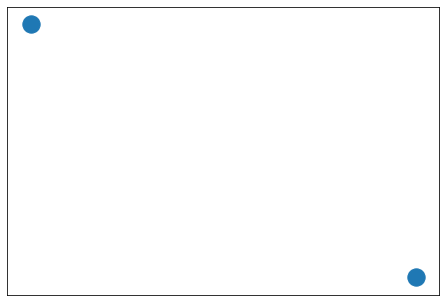

In [40]:
# networkx draw Graph van de vorige cel
try:
    nx.draw(G)
# we verwijderen de AttributeError omdat we weten dat er geen edges zijn.
except: 
    AttributeError
    


## RDF gegevens maken 👨‍🏭
RDF-gegevens worden gerepresenteerd door modellen met daarin knopen (net zoals in networkx) Deze knopen kunnen URI-verwijzingen, ‘lege’ knopen of literals zijn. In RDFLib, de library die jullie net hebben gedownload, worden deze knopen vertegenwoordigd door drie verschillende classes:

* URIRef: is een knoop waarvan de exacte URI bekend is. URIRefs worden ook gebruikt om de eigenschappen en predikaten in de RDF-grafiek weer te geven.  Voorbeelden hiervan zijn een persoon, een bedrijf, een website. Unirefs worden als volgt gemaakt van Python-objecten; <br>`Koen = Uniref('Koen')`

*  BNode: is een knoop waarvan de exacte URI niet bekend is. Voorbeelden hiervan zijn een persoon, een bedrijf, een website. Bnodes worden als volgt gemaakt van Python-objecten; <br>`Jesse = BNode()`

* Literals: Zijn eigenschappen van knopen. Voorbeelden hiervan zijn  een naam (Jesse), een datum (2 maart), een leeftijd (23). Literals worden als volgt gemaakt van Python-objecten; <br>`age = Literal(24)`

### Triples toevoegen aan het web 🕸️
Triples kunnen ook rechtstreeks worden toegevoegd met behulp van `.add()`. Deze python functie accepteert een drievoudige-tuple (Triples genaamd in RDFLib) van RDFLib-knopen. Hieronder worden twee voorbeelden gegeven van het toevoegen van een aantal triples. In het eerste voorbeeld wordt er gebruik gemaakt van variabelen om de URIRefs te krijgen; dit hoeft niet, maar is handig als je meerdere nodes wil met dezelfde URIRef.

### Namespace 🚀
In computer science is een namespace een reeks tekens (namen) die worden gebruikt om verschillende soorten objecten (de namen van typen, functies, variabelen, etc.) te identificeren en ernaar te verwijzen Namespaces worden gebruikt om code in logische groepen te ordenen en om namespace conflicten (bijvoorbeeld twee dezelfde variabele namen) te voorkomen die kunnen optreden wanneer een stuk code meerdere bibliotheken (zoals RDFlib en networkx) bevat.

RDFLib biedt verschillende snelkoppelingen om met veel URI's in dezelfde namespace te werken. Rdflib.namespace definieert de namespace class waarmee je eenvoudig URI's kunt aanmaken in een namespace zoals hieronder wordt aangegeven in het voorbeeld `from rdflib.namespace import RDF`. Het toevoegen van RDF.type in G.add() zorgt ervoor dat er een 'a' in de output komt te staan, tussen de URIRef en Literal.

In [41]:
# maak Graph
G = Graph()

# manier 1: 
# maak URIRefs
koen = URIRef('koen')
jesse = URIRef('jesse')

#voeg nodes toe
G.add((koen, RDF.type, Literal('1')))
G.add((koen, RDF.type, Literal('2')))
G.add((jesse, RDF.type, Literal('3')))

# manier 2: 
G.add((URIRef('rama'), RDF.type, Literal('4')))
G.add((URIRef('max'), RDF.type, Literal('5')))
G.add((BNode(), RDF.type, Literal('empty')))

# print Graph
print(G.serialize(format='turtle').decode('utf-8'))


<jesse> a "3" .

<koen> a "1",
        "2" .

<max> a "5" .

<rama> a "4" .

[] a "empty" .




## RDF Lists en Dicts 📚
Het toevoegen van RDF-gegevens die afkomstig zijn uit lists of dicts kan met behulp van... een simpele for loop. Hieronder  twee voorbeelden.

In [42]:
# maak Graph
G = Graph()

# nodes toevoegen met een list
name_list = ['jesse', 'max', 'joop', 'karl', 'koen', 'rama', 'maarten']
for n in name_list:
    G.add((URIRef(n), RDF.type, Literal('naam')))
    
# print Graph
print(G.serialize(format='turtle').decode('utf-8'))


<jesse> a "naam" .

<joop> a "naam" .

<karl> a "naam" .

<koen> a "naam" .

<maarten> a "naam" .

<max> a "naam" .

<rama> a "naam" .




In [43]:
# maak Graph
G = Graph()

# nodes toevoegen met een dict
name_age_dict = {'joep': '23', 'johan' : '25', 'karl' : '3', 'henk' : '15', 'maarten' : '41', 'josef' : '38'}
for n in name_age_dict.keys():
    G.add((URIRef(n), RDF.type, Literal((name_age_dict.get(n)))))
    
# print Graph
print(G.serialize(format='turtle').decode('utf-8'))


<henk> a "15" .

<joep> a "23" .

<johan> a "25" .

<josef> a "38" .

<karl> a "3" .

<maarten> a "41" .




### Triples verwijderen 🗑️
Triples verwijderen kan met de `.remove()` functie. Deze functie neemt als variabele een triple, wat betekent dat je deze functie ook kan gebruiken om te 'filteren' in de Graph. Zie onderstaande voorbeelden:

In [44]:
# maak Graph
G = Graph()

# voeg nodes toe
G.add((URIRef('koen'), RDF.type, Literal('1')))
G.add((URIRef('koen'), RDF.type, Literal('2')))
G.add((URIRef('koen'), RDF.type, Literal('3')))
G.add((URIRef('jesse'), RDF.type, Literal('2')))

# print complete Graph
print(G.serialize(format='turtle').decode('utf-8'))

# verwijder specifieke triple
G.remove((URIRef('koen'), RDF.type, Literal('3')))

# print Graph zonder specifieke triple
print(G.serialize(format='turtle').decode('utf-8'))

# verwijder alle triples met Literal('2')
G.remove((None, None, Literal('2')))

# print final Graph
print(G.serialize(format='turtle').decode('utf-8'))


<jesse> a "2" .

<koen> a "1",
        "2",
        "3" .



<jesse> a "2" .

<koen> a "1",
        "2" .



<koen> a "1" .




## De opdracht 🎒 
Nu jullie bekend zijn met de beginselen van RDFLib en een overzicht hebben van de basale functies van RDFLib, mogen jullie een opdracht maken in de volgende cel. Dat is toch geweldig! Programmeer in de onderstaande cel de RDFLib Graph van `name_age_dict`. Het netwerk moet daarnaast wel aan vijf eisen voldoen:
1. Joep en Karl moeten niet in het netwerk.
2. Evert van 25 jaar oud moet wél in het netwerk.
3. Alle namen moeten verbonden zijn aan de juiste leeftijd.
4. Jesse is ouder, namelijk 23, niet 22. Pas dit aan in het netwerk.
5. Geef het nieuwe netwerk weer in het 'turtle' format.

In [45]:
name_age_dict = {'joep' : '23', 'johan' : '25', 'karl' : '3', 'henk' : '15', 
                 'maarten' : '41', 'josef' : '38', 'koen' : '19', 'jesse' : '22'}

In [46]:
# YOUR CODE HERE

# Webtalen 🇬🇧
In dit gedeelte van de tutorial, wordt meer achtergrondinformatie en theorie gegeven over de webtalen RDFS, DL Lite, web ontology languages en OWL.

## Wat is RDFS? 🤯
**RDFS** is een taal om bepaalde modellen te verbieden, om zo restricties op te leggen aan je modellen. 4 voorbeelden van restricties, volgens de vier soorten beperkingen:
1. Elk mens is sterfelijk.
2. Als je van iemand houdt ken je diegene.
3. Alleen mensen kunnen Engels praten.
4. Grootte is altijd een relatie tussen een object en een getal (bijvoorbeeld cm).

De **restricties van RDFS** zijn:
1. Universele zinnen (Geldt altijd).
2. Geen feiten (Is alleen om restricties op te leggen, niet zoals RDF).
3. Leggen restricties op aan de eigenschappen en relaties.
4. Beperken de modellen.

Er zijn **vier soorten RDFS beperkingen**:
1. Subklasse: Elke A is B (Een mens is altijd sterfelijk).
2. Subproperly: A & B zijn X, dus ook Y (Als je van iemand houdt ken je diegene).
3. Domeinrestrictie: X kan alleen (door) A (Alleen mensen kunnen engels praten).
4. Range restrictie: X is altijd een ‘product’ van een specifieke A & B: (Grootte is het ‘product’ van een object & getal).

Een **RDFS beperking** is dus een disjunctie of een negatie. Het limiteert de RDF-relaties op een manier waarbij de zinnen universeel en simpel zijn, en eigenlijk spreken ze voor zich. Door ze op te schrijven krijg je ze in beeld.
**DL Lite** (DL = Description logic) is een andere taal dan RDFS waarbij je in plaats van de beperkingen in predikaatlogica zet, je ze in **UML diagrammen** weergeeft. Om predikaatlogica simpel uit te drukken heb je niet alles nodig. DL Lite zorgt ervoor dat je weinig negatie en disjunctie hoeft te gebruiken. 

## Wat is OWL? 🦉
**OWL** (Web ontology language) is net als DL een web ontology language, maar niet de enige. Deze twee zijn voorbeelden van uitbreidingen van DL Lite. OWL(?) is een beperking waarbij er een algoritme is dat implies kan oplossen. Deze beperkingen zijn **beslisbaar**.
	**Beslisbaar** is prop logica, zoals we in eerdere weken hebben geprogrammeerd in Jupyter, maar geen predikaatlogica. Predikaatlogica is niet beslisbaar voor een algoritme, prop logica wel. Alles wat we dus geprogrammeerd hebben is beslisbaar, en alles wat op papier of handmatig moest is niet beslisbaar. Wel zijn er talen tussen deze twee in die beslisbaar zijn, zoals FO logica met 1-plaatsige variabelen of 2 variabelen.
FO logica met 1-plaatsige variabelen: ...
FO logica met 2 variabelen: ...
Dat iets beslisbaar is betekent niet gelijk dat het werkbaar is. Soms duurt het voor een machine veel te lang en is het dus te duur om het te berekenen. 

Als we naar OWL en descriptielogica kijken zien we dat:
Bevatten volledige propositielogica en zijn binnen polynomiale tijd op te lossen.
Zijn beperkingen van FO predicaten logica
Ze bevatten maar twee variabelen in de formules en de universele statements zijn beperkt in uitdrukkingskracht. Γ⊨𝜙 is in de meeste web ontologie talen nog lastiger op te lossen dan in propositielogica. Dit komt door de hoeveelheid extra ruimte en tussenstappen die een computer moet nemen om het op te lossen.
Het is makkelijk om simpele discriptielogica uit te drukken in OWL met twee variabelen en zonder negatie is er meestal een oplossing.  Maar beperkingen zijn moeilijk uit te drukken.

## Modellen en Kennisgrafen 📈
Een **kennisgraaf** lijkt op een **networkx graaf**. Echter, het grootste verschil is dat een kennisgraaf een soort ‘perfecte versie’ van een networkx graaf is. Deze twee, de kennisgraaf en networkx graaf, hebben een aantal dingen gemeen:
* Het zijn beiden een verzameling positeive feiten over individuen (nodes).
* Ze hebben eigenschappen voor die individuen
* Ze laten beiden relaties tussen de individuen zien (dmv edges)

Wat een kennisgraaf verschillend maakt:
* Het is een verzameling ‘minimale eisen’ die in een graafmodel gestopt zijn
* Elke networkx graaf is een soort ‘remix’ van de kennisgraaf
* De kennisgraaf is dus een soort basisversie
* Er kunnen extra regels zijn  (zoals RDFS) die ervoor zorgen dat er iets anders gebeurt in de networkx graaf dan in de kennisgraaf. Bijvoorbeeld: Iemand heeft altijd twee ouders in de kennisgraaf, maar als er iemand tussen zou zitten met 3 ouders (ook al is dat niet mogelijk), dan kan je de kennisgraaf nog steeds opleggen.

Wanneer je **RDFS** aan de **kennisgraaf** oplegt, beperk je de mogelijke modellen, maar zorg je ervoor dat er méér waar is dan er eerst in de kennisgraaf stond. Immers, als je een nieuwe regel toevoegt geeft dit nieuwe mogelijkheden. D

Het **verband tussen logica en RDFS**, **DL Lite** en **OWL** is dat het allemaal talen zijn om kennis in uit te drukken. Ze verschillen in kracht en complexiteit van redeneerproces, snelheid om te rekenen en beslisbaarheid dus.


## Hoe verhoudt RDF zich tot de netwerktheorie? 📉
Zoals ook al eerder beschreven heb je in RDF Classes en Properties. Wanneer we naar de netwerktheorie (networkx) kijken komen classes overeen met de eigenschap van een knoop (node) en de properties overeen met de relatie tussen knopen (edges). Het verschil tussen RDF en de netwerktheorie is dat edges en nodes in networkx niet altijd een  eigenschap hebben. Zo zijn er complete netwerken van knopen met edges waar geen attributes aan te pas komen. In RDF hebben zowel classes als properties altijd eigenschappen. Door de 1-plaatsige relaties van een class heeft een class altijd een eigenschap (in networkx de attribute) van een node).  Daarnaast is er bij properties altijd een relatie tussen twee objecten en is de relatie ertussen de eigenschap (in networkx de attribute van de edge). 

## Hoe werken SPARQL queries? ✨
SPARQL staat voor Sparql Protocol And RDF Query Language. Het is een RDF-zoektaal waarbij RDF-gebaseerde data bevraagt worden door middel van queries (zoekopdrachten). Dit maakt het mogelijk voor applicaties om informatie op te vragen op het semantisch web. SPARQL maakt het voor gebruikers mogelijk om queries te schrijven tegen key-value data, oftewel data volgens RDF specificaties. Daarom bestaat een SPARQL database ook uit subject-predicaat-object triples. 

| empNum | given-name | family-name | position | hireDate    |
|--------|------------|-------------|----------|-------------|
| emp1   | Elon       | Musk        | CEO      | 2008-10-03  |
| emp2   | Larry      | Ellison     | CTO      | 2018-05-07  |
| emp3   | Zach       | Kirkhorn    | CFO      | 2019--03-19 |


In de bovenstaande tabel is de row-identifier **emp2** de subject, de kolomnaam **position** is de predicate en de value **CTO** is de object. 

De bijbehorende triple ziet er dan uit als: 
* **sn:emp2  vcard:position  “CTO”**

Om queries te schrijven om data te bevragen kan er gebruikt worden van de:
* SELECT query
Om raw values op te vragen van een SPARQL eindpunt, keert informatie terug in tabelvorm
* CONSTRUCT query
Om raw values op te vragen van een SPARQL eindpunt en om te zetten naar RDF
* ASK query
Om een True/False antwoord terug te krijgen van een query
* DESCRIBE query
Om een RDF grafiek op te vragen van een SPARQL eindpunt

Alle queries maken gebruik van een WHERE blok om de query te beperken, bij de DESCRIBE query is dat echter optioneel.

Om een tabel op te vragen met alle achternamen en posities van de tabel 

kan er daarvoor een SPARQL query geschreven worden

`"""SELECT DISTINCT ?familyName ?position
        WHERE {
            ?person foaf:family-name ?familyName .
            ?person foaf:position ?position
        }"""                       `

Bij het runnen van de query krijg je vervolgens als output:

| ?familyName | ?position |
|-------------|-----------|
| Musk        | CEO       |
| Ellison     | CTO       |
| Kirkhorn    | CFO       |

In [47]:
#!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import Graph, Namespace, Literal, URIRef, BNode
from rdflib.namespace import FOAF, RDF, RDFS

In [48]:
g=Graph()
g.parse('http://dbpedia.org/resource/Michael_Jackson')
print(g.serialize(format="turtle").decode("utf-8"))

@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbp: <http://dbpedia.org/property/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <http://schema.org/> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://dbpedia.org/resource/!Wowow!> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Michael_Jackson> .

<http://dbpedia.org/resource/%22Weird_Al%22_Yankovic> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Michael_Jackson> .

<http://dbpedia.org/resource/%22Weird_Al%22_Yankovic's_Greatest_Hits> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Michael_Jackson> .

<http://dbpedia.org/resource/%22Weird_Al%22_Yankovic_in_3-D> dbo:wikiPageWikiLink <http://db

In [49]:
triples= [triple for triple in g]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/All_in_Your_Name'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/artist'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Santana_(band)'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))],
 9368)

In [50]:
import rdflib
g = rdflib.Graph()


qres = g.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult, 0, [])

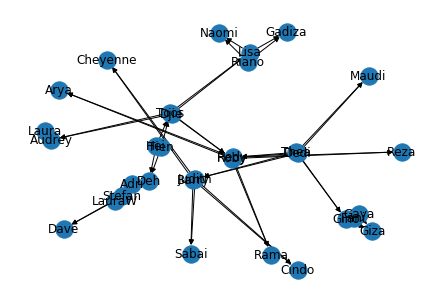

In [51]:
# Networkx familie graph

def zetGeslacht(Fam, M, V):
    for n in M:
        Fam.nodes[n]['M']=True
        Fam.nodes[n]['V']=False
    for n in V:
        Fam.nodes[n]['V']=True
        Fam.nodes[n]['M']=False
    return Fam

FamilieRama = nx.DiGraph()
FamilieRama.add_nodes_from(['Rama','Arya','Reza','Roby','Stefan','Djie','Gino','Cindo','Dedi','Hedy','Naomi','Gadiza','Laura','Lisa','Audrey','Maudi','Judith','Cheyenne','Sabai','Fani','Giza','Toos','Thea','Barry','Gaya','Riano','Deh','Adri','Dave','Tien','Hei','LauraW'])

M = {'Rama','Arya','Reza','Roby','Stefan','Djie','Gino','Cindo','Dedi','Barry','Riano','Adri','Dave','Tien'}
V = {'Hedy','Naomi','Gadiza','Laura','Lisa','Audrey','Maudi','Judith','Cheyenne','Sabai','Fani','Giza','Toos','Thea','Gaya','Deh','Hei','LauraW'}

FamilieRama = zetGeslacht(FamilieRama, M, V)

FamilieRama.add_edges_from([('Roby','Rama'), ('Roby','Arya'), ('Roby','Reza'), ('Djie','Roby'), ('Hedy','Rama'), ('Hedy','Arya'), ('Hedy','Reza'), ('Lisa','Naomi'), ('Lisa','Gadiza'), ('Djie','Lisa'), ('Djie','Audrey'), 
                  ('Toos','Lisa'), ('Toos','Roby'), ('Toos','Audrey'), ('Audrey','Laura'), ('Dedi','Hedy'), ('Thea','Hedy'), ('Dedi','Maudi'), ('Dedi','Judith'), ('Dedi','Gino'), ('Thea','Maudi'),
                 ('Thea','Judith'), ('Thea','Gino'), ('Judith','Cheyenne'), ('Judith','Sabai'), ('Judith','Cindo'), ('Gino','Fani'), ('Gino','Giza'), ('Barry','Cheyenne'), ('Barry','Sabai'),('Barry','Cindo')
                 , ('Gaya','Fani'), ('Gaya','Giza'), ('Riano','Naomi'), ('Riano','Gadiza'), ('Deh','Stefan'), ('Adri','Stefan'), ('Stefan','Dave'), ('LauraW','Dave'),
                 ('Tien','Toos'), ('Tien','Deh'), ('Hei','Toos'), ('Hei','Deh')])


nx.draw(FamilieRama, with_labels=True)

In [52]:
FOAF.name = URIRef("name")
FOAF.parentOf = URIRef("parentOf")
FOAF.gender = URIRef("gender")
FOAF.person = URIRef("person")
RDF.type = URIRef("type")

def networkx2RDF(G):
    
    n = Namespace(G.edges())
    g = Graph()
    g.bind("foaf", FOAF)
    
    for node in G.nodes():
        node = URIRef(str(node))
        name = Literal(str(node))
        m = Literal('M')
        v = Literal('V')
        g.add((node, FOAF.name, name))
        g.add((node, RDF.type, FOAF.person))
        
        if G.nodes[str(node)]['M'] == True:
            g.add((node, FOAF.gender, m))
        elif G.nodes[str(node)]['V'] == True:
            g.add((node, FOAF.gender, v))
        else:
            None
        
    for edge in G.edges():
        person_a = edge[0]
        person_a= URIRef(str(edge[0]))
        person_b= edge[1]
        person_b= BNode()
        g.add((person_a, FOAF.parentOf, person_b))
        g.add((person_b, FOAF.name, Literal(str(edge[1]))))
        
    return(g)

In [53]:
g = networkx2RDF(FamilieRama)
print(g.serialize(format="turtle").decode("utf-8"))


<Adri> <gender> "M" ;
    <name> "Adri" ;
    <parentOf> [ <name> "Stefan" ] ;
    a <person> .

<Arya> <gender> "M" ;
    <name> "Arya" ;
    a <person> .

<Audrey> <gender> "V" ;
    <name> "Audrey" ;
    <parentOf> [ <name> "Laura" ] ;
    a <person> .

<Barry> <gender> "M" ;
    <name> "Barry" ;
    <parentOf> [ <name> "Cheyenne" ],
        [ <name> "Sabai" ],
        [ <name> "Cindo" ] ;
    a <person> .

<Cheyenne> <gender> "V" ;
    <name> "Cheyenne" ;
    a <person> .

<Cindo> <gender> "M" ;
    <name> "Cindo" ;
    a <person> .

<Dave> <gender> "M" ;
    <name> "Dave" ;
    a <person> .

<Dedi> <gender> "M" ;
    <name> "Dedi" ;
    <parentOf> [ <name> "Hedy" ],
        [ <name> "Maudi" ],
        [ <name> "Judith" ],
        [ <name> "Gino" ] ;
    a <person> .

<Deh> <gender> "V" ;
    <name> "Deh" ;
    <parentOf> [ <name> "Stefan" ] ;
    a <person> .

<Djie> <gender> "M" ;
    <name> "Djie" ;
    <parentOf> [ <name> "Roby" ],
        [ <name> "Lisa" ],
        [ <name> "

In [54]:
#familierelaties

g = networkx2RDF(FamilieRama)

vader = g.query(
    """SELECT DISTINCT ?aname ?bname
        WHERE {
            ?a foaf:gender ?gender .
            ?a foaf:parentOf ?b .
            ?a foaf:name ?aname .
            ?b foaf:name ?bname .
            FILTER(?gender = "M") .
        }""")

moeder = g.query(
    """SELECT DISTINCT ?aname ?bname
        WHERE {
            ?a foaf:gender ?gender .
            ?a foaf:parentOf ?b .
            ?a foaf:name ?aname .
            ?b foaf:name ?bname .
            FILTER(?gender = "V") .
        }""")

oma = g.query(
    """SELECT DISTINCT ?aname ?cname
        WHERE {
            ?a foaf:gender ?gender .
            ?a foaf:parentOf ?b .
            ?b foaf:parentOf ?c .
            ?a foaf:name ?aname .
            ?c foaf:name ?cname .
            FILTER(?gender = "V") .
        }""")

opa = g.query(
    """SELECT DISTINCT ?aname ?cname
        WHERE {
            ?a foaf:gender ?gender .
            ?a foaf:parentOf ?b .
            ?b foaf:parentOf ?c .
            ?a foaf:name ?aname .
            ?c foaf:name ?cname .
            FILTER(?gender = "M") .
        }""")

broer = g.query(
    """SELECT DISTINCT ?aname ?cname
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?a foaf:name ?aname .
            ?c foaf:name ?cname .
            FILTER(?gender = "M") .
        }""")

zus = g.query(
    """SELECT DISTINCT ?aname ?cname
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?a foaf:name ?aname .
            ?c foaf:name ?cname .
            FILTER(?gender = "V") .
        }""")

oom = g.query(
    """SELECT DISTINCT ?aname ?dname
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?c foaf:parentOf ?d .
            ?a foaf:name ?aname .
            ?d foaf:name ?dname .
            FILTER(?gender = "M") .
        }""")

tante = g.query(
    """SELECT DISTINCT ?aname ?dname
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?c foaf:parentOf ?d .
            ?a foaf:name ?aname .
            ?d foaf:name ?dname .
            FILTER(?gender = "V") .
        }""")

neef = g.query(
    """SELECT DISTINCT ?ename ?dname
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?c foaf:parentOf ?d .
            ?a foaf:parentOf ?e .
            ?a foaf:name ?aname .
            ?d foaf:name ?dname .
            FILTER(?gender = "M") .
        }""")

nicht = g.query(
    """SELECT DISTINCT ?ename ?dname
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?c foaf:parentOf ?d .
            ?a foaf:parentOf ?e .
            ?a foaf:name ?aname .
            ?d foaf:name ?dname .
            FILTER(?gender = "V") .
        }""")

zoon = g.query(
    """SELECT DISTINCT ?bname ?aname
        WHERE {
            ?b foaf:gender ?gender .
            ?a foaf:parentOf ?b .
            ?a foaf:name ?aname .
            ?b foaf:name ?bname .
            FILTER(?gender = "M") .
        }""")

dochter = g.query(
    """SELECT DISTINCT ?bname ?aname
        WHERE {
            ?b foaf:gender ?gender .
            ?a foaf:parentOf ?b .
            ?a foaf:name ?aname .
            ?b foaf:name ?bname .
            FILTER(?gender = "V") .
        }""")

oudoom = g.query(
    """SELECT DISTINCT ?aname ?ename
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?c foaf:parentOf ?d .
            ?c foaf:parentOf ?e .
            ?a foaf:name ?aname .
            ?e foaf:name ?ename .
            FILTER(?gender = "M") .
        }""")

oudtante = g.query(
    """SELECT DISTINCT ?aname ?ename
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?c foaf:parentOf ?d .
            ?c foaf:parentOf ?e .
            ?a foaf:name ?aname .
            ?e foaf:name ?ename .
            FILTER(?gender = "V") .
        }""")

achterneef = g.query(
    """SELECT DISTINCT ?fname ?ename
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?c foaf:parentOf ?d .
            ?c foaf:parentOf ?e .
            ?a foaf:parentOf ?f .
            ?f foaf:name ?fname .
            ?e foaf:name ?ename .
            FILTER(?gender = "M") .
        }""")

achternicht = g.query(
    """SELECT DISTINCT ?fname ?ename
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?c foaf:parentOf ?d .
            ?c foaf:parentOf ?e .
            ?a foaf:parentOf ?f .
            ?f foaf:name ?fname .
            ?e foaf:name ?ename .
            FILTER(?gender = "V") .
        }""")

achterachterneef = g.query(
    """SELECT DISTINCT ?gname ?ename
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?c foaf:parentOf ?d .
            ?c foaf:parentOf ?e .
            ?a foaf:parentOf ?f .
            ?f foaf:parentOf ?g .
            ?g foaf:name ?gname .
            ?e foaf:name ?ename .
            FILTER(?gender = "M") .
        }""")

achterachternicht = g.query(
    """SELECT DISTINCT ?gname ?ename
        WHERE {
            ?a foaf:gender ?gender .
            ?b foaf:parentOf ?a .
            ?b foaf:parentOf ?c .
            ?c foaf:parentOf ?d .
            ?c foaf:parentOf ?e .
            ?a foaf:parentOf ?f .
            ?f foaf:parentOf ?g .
            ?g foaf:name ?gname .
            ?e foaf:name ?ename .
            FILTER(?gender = "V") .
        }""")

In [55]:
#voorbeeld graph
g = rdflib.Graph()

result = g.parse("http://www.w3.org/People/Berners-Lee/card")

for subj, pred, obj in g:
    if (subj, pred, obj) not in g:
       raise Exception("It better be!")

print(g.serialize(format="turtle").decode("utf-8"))

@prefix : <http://xmlns.com/foaf/0.1/> .
@prefix cc: <http://creativecommons.org/ns#> .
@prefix cert: <http://www.w3.org/ns/auth/cert#> .
@prefix con: <http://www.w3.org/2000/10/swap/pim/contact#> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix doap: <http://usefulinc.com/ns/doap#> .
@prefix geo: <http://www.w3.org/2003/01/geo/wgs84_pos#> .
@prefix ldp: <http://www.w3.org/ns/ldp#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <http://schema.org/> .
@prefix sioc: <http://rdfs.org/sioc/ns#> .
@prefix solid: <http://www.w3.org/ns/solid/terms#> .
@prefix space: <http://www.w3.org/ns/pim/space#> .
@prefix vcard: <http://www.w3.org/2006/vcard/ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://dig.csail.mit.edu/2005/ajar/ajaw/data#Tabulator> doap:developer <https://www.w3.org/People/Berners-Lee/card#i> .

<http://dig.csail.mit.edu/2007/

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']].
NETWORK SIZE
The network has 73 nodes and 78 edges

CONNECTED COMPONENTS
The graph has 2 connected components
Connected component 0 has 68 nodes
Connected component 1 has 5 nodes

CLUSTERS
The graph has 73 clusters
Cluster 0 has 42 nodes
Cluster 1 has 34 nodes
Cluster 2 has 44 nodes
Cluster 3 has 36 nodes
Cluster 4 has 41 nodes
Cluster 5 has 44 nodes
Cluster 6 has 38 nodes
Cluster 7 has 43 nodes
Cluster 8 has 37 nodes
Cluster 9 has 11 nodes
Cluster 10 has 7 nodes
Cluster 11 has 15 nodes
Cluster 12 has 39 nodes
Cluster 13 has 67 nodes
Cluster 14 has 40 nodes
Cluster 15 has 57 nodes
Cluster 16 has 37 nodes
Cluster 17 has 40 nodes
Cluster 18 has 19 nodes
Cluster 19 has 46 nodes
Cluster 20 has 5 nodes
Cluster 21 has 43 nodes
Cluster 22 has 33 nodes
Cluster 23 has 19 nodes
Cluster 24 has 19 nodes
Cluster 25 has 49 nodes
Cluster 26 has 33 nodes
Cluster 27 has 512 nodes
Cluster 28 has 19 nodes
Cluster 29 has 17 nodes
Cluste

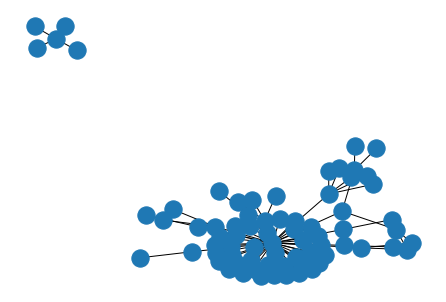

In [56]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx

G = rdflib_to_networkx_graph(g)
print(g)

print("NETWORK SIZE")
print("============")
print("The network has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
print()


# Degree centrality -- mean and stdev
dc = nx.degree_centrality(G)
degrees = []
for k,v in dc.items():
    degrees.append(v)
    
# Connected components
cc = list(nx.connected_components(G))
print("CONNECTED COMPONENTS")
print("====================")
print("The graph has {} connected components".format(len(cc)))
for i,c in enumerate(cc):
    print("Connected component {} has {} nodes".format(i,len(c)))
print()

# Clusters
cl = nx.clustering(G)
print("CLUSTERS")
print("========")
print("The graph has {} clusters".format(len(cl)))
for i,c in enumerate(cl):
    print("Cluster {} has {} nodes".format(i,len(c)))
print()

# Plot
print("Visualizing the graph:")
nx.draw(G, with_labels=False)